## Homework 3 A1: Predicting Car Price
By Pattranit Teerakoson (st123050)

### Task 1. Classification 
- Based on 02 - Multinomial Logistic Regression.ipynb, modify LogisticRegression() class as follows:

In [2]:
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
# os.environ["LOGNAME"] = "st123050-a3"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st123050-a3")

<Experiment: artifact_location='mlflow-artifacts:/345735210583965692', creation_time=1696037423162, experiment_id='345735210583965692', last_update_time=1696037423162, lifecycle_stage='active', name='st123050-a3', tags={}>

In [3]:
# import mlflow
logged_model = 'runs:/018ee66ecfec41eb85f85a9258b8e7ea/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

c:\Users\ll\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import numpy as np
np.argmax(loaded_model.predict(np.array([[ 1., -0.28365698 ,-0.42642682 , 0.7923492 ]])), axis=1)

array([2], dtype=int64)

In [13]:
a = np.array([[ 1., -0.28365698 ,-0.42642682 , 0.7923492 ]])

In [14]:
a.shape

(1, 4)

In [8]:
loaded_model.predict

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 018ee66ecfec41eb85f85a9258b8e7ea

In [7]:
import pickle as pkl
import cloudpickle

cloudpickle.dump(loaded_model, open('best_classification.pkl' , 'wb'))

In [3]:
#Download the Car Price dataset from Google classroom. Perform loading, EDA, preprocessing, model selection, · · · , inference. Grade will be given based on the how well
#you adhere to best practices. There are some important coding considerations:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Download Dataset
df = pd.read_csv('C:/Users/ll/Desktop/HW_local/dataset/Cars.csv')

• First, make sure you used the preprocessed version of the dataset that you have done in A1/A2.

Following the preprocessed version, convert the label selling price into discrete variable by simply putting the price in a bucket of 0, 1, 2, 3, which will result in a 4-class classification problem. One possible function is to use pd.cut(), but feel free to use whatever methods to achieve this.

In [5]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [6]:
#rename owner lows
df['owner'].replace({
        'First Owner':1,
        'Second Owner':2,
        'Third Owner':3,
        'Fourth & Above Owner':4,
        'Test Drive Car':5
    }, inplace=True)

In [7]:
df['owner'] = df['owner'].astype(int)

In [8]:
df["owner"].unique()

array([1, 2, 3, 4, 5])

In [9]:
df_1= df[df['fuel'] != 'CNG']
df_2= df_1[df_1['fuel'] != 'LPG']

df_2["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [10]:
df_2['mileage'] = df_2['mileage'].str.split().str[0]
df_2['mileage'] = pd.to_numeric(df_2['mileage'], errors='coerce')

In [11]:
df_2['engine'] = df_2['engine'].str.split().str[0]
df_2['engine'] = pd.to_numeric(df_2['engine'], errors='coerce')

In [12]:
df_2['max_power'] = df_2['max_power'].str.split().str[0]
df_2['max_power'] = pd.to_numeric(df_2['max_power'], errors='coerce')

In [13]:
df_2['name'] = df_2['name'].str.split().str[0]
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:
#df.drop(columns=['torque'])
df_2 = df_2.drop('torque', axis=1)
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [15]:
newCar = df_2.where(df["owner"] == 5)
selected_rows = newCar[~newCar['owner'].isnull()]
selected_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019.0,1350000.0,5400.0,Diesel,Dealer,Manual,5.0,22.27,1498.0,108.60,5.0
4950,Audi,2019.0,6223000.0,7800.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4951,Audi,2019.0,5923000.0,11500.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4952,Audi,2019.0,6523000.0,23600.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
6220,Honda,2019.0,2000000.0,24857.0,Petrol,Dealer,Automatic,5.0,16.50,1799.0,139.46,5.0


In [16]:
df_3= df_2[df_2['owner'] != '5']

In [17]:
y = np.log(df_3['selling_price'])
pred_y = np.exp(y)

In [18]:
df_3['selling_price'] = np.log(df_3['selling_price'])

**Task 1.2 Report** - In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing
and analysing the results. Possible points of discussion:

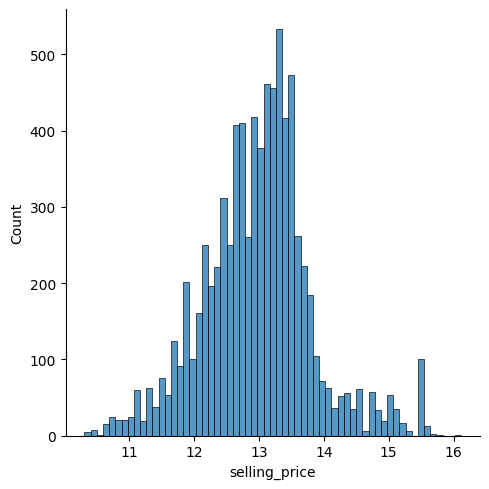

In [19]:
sns.displot(data = df_3, x = 'selling_price')

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_3["seller_type"] = le.fit_transform(df_3["seller_type"])
#df["selling_price"].unique()
#le.classes_

In [21]:
le.classes_
le.transform(['Dealer', 'Individual', 'Trustmark Dealer'])

array([0, 1, 2])

In [22]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   float64
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   int32  
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(3)
memory usage: 1011.1+ KB


In [23]:
#ถ้าคิดว่าไม่ใช้ให้ Drop เลย
df_3 = df_3.drop(['fuel', 'transmission','owner','name'],axis=1)

<Axes: >

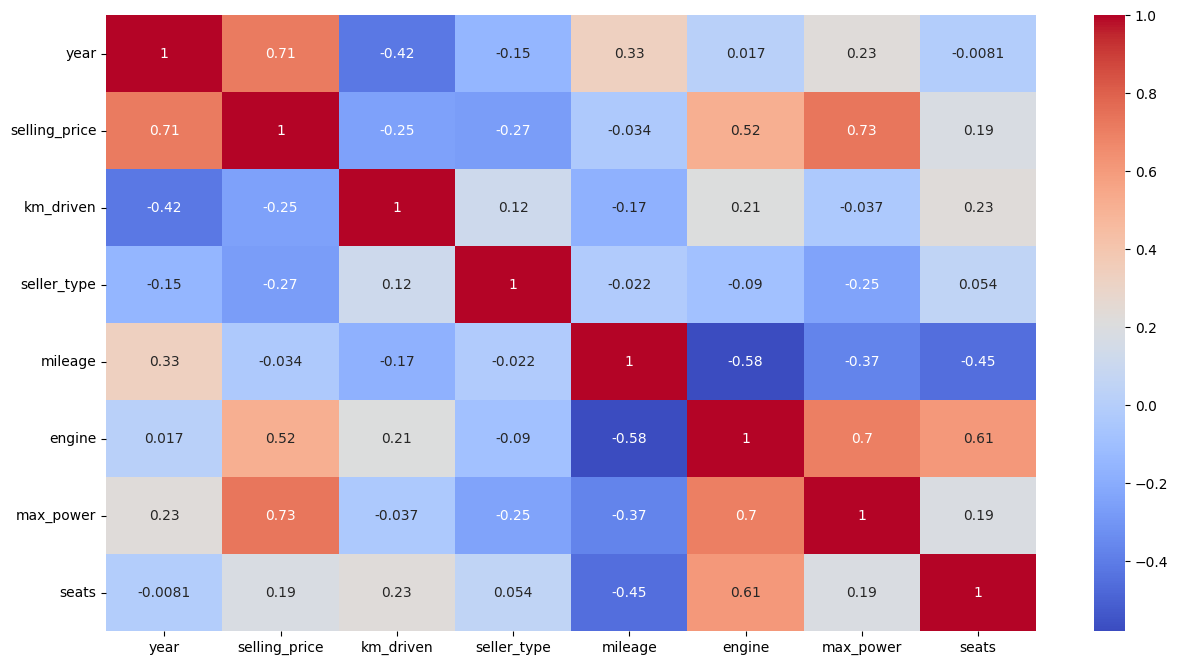

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(df_3.corr(), annot=True, cmap="coolwarm") 

**Task 1.3 Find algorithm perform this well** - In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing
and analysing the results. Possible points of discussion:

In [25]:
from sklearn.model_selection import train_test_split
#x is our strong features
X = df_3[['max_power', 'engine', 'year']]

#y is simply the life expectancy col
y = df_3["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
#check all the lost number
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    148
engine       153
year           0
dtype: int64

In [27]:
X_test[['max_power', 'engine', 'year']].isna().sum()

max_power    60
engine       61
year          0
dtype: int64

In [28]:
y_train.isna().sum()

0

In [29]:
X_train['max_power']

1495     62.10
5818    100.00
1281     90.00
1421     90.00
7173     81.83
         ...  
5289     81.80
5456       NaN
865      88.76
7696     46.30
7361       NaN
Name: max_power, Length: 5623, dtype: float64

In [30]:
import pandas as pd
# Calculate the value counts
value_counts = X_train['max_power'].value_counts()

# Get the maximum count
max_count = value_counts.max()

print("Maximum Count:", max_count)
value_counts

Maximum Count: 267


74.00     267
81.80     156
88.50     141
67.00     121
88.70     113
         ... 
68.40       1
174.57      1
139.46      1
86.79       1
265.00      1
Name: max_power, Length: 289, dtype: int64

In [31]:
print(X_train['max_power'].median())
print(X_train['engine'].median())
X_train['year'].mode()

82.0
1248.0


0    2017
Name: year, dtype: int64

In [32]:
#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [33]:
X_train

,max_power,engine,year
1495,62.100000,2523.0,2013
5818,100.000000,1493.0,2012
1281,90.000000,1248.0,2010
1421,90.000000,1396.0,2010
7173,81.830000,1197.0,2015
...,...,...,...
5289,81.800000,1197.0,2014
5456,92.014809,1248.0,2006
865,88.760000,1248.0,2015
7696,46.300000,796.0,2010


In [34]:
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    0
engine       0
year         0
dtype: int64

In [35]:
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

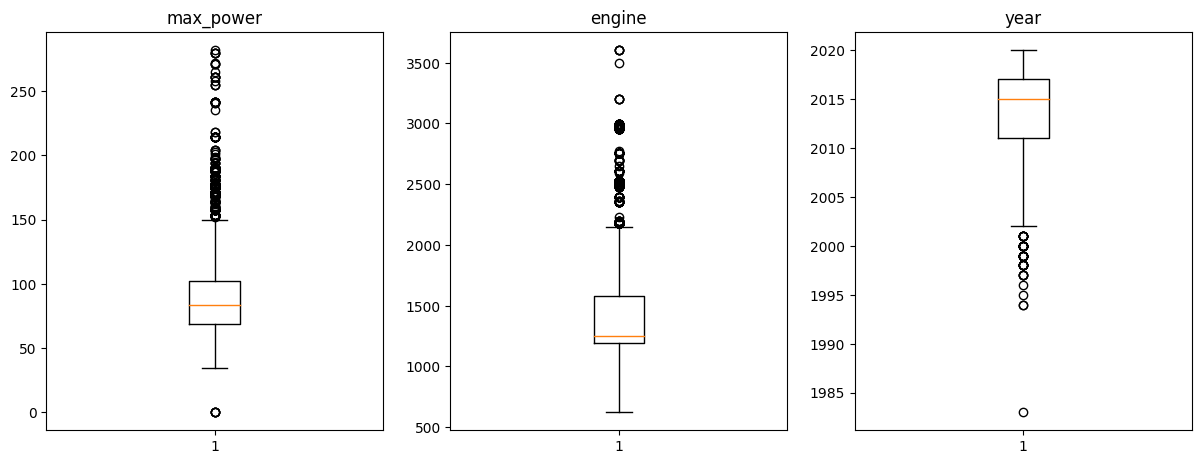

In [36]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'engine':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [37]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [38]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5623, 3)
Shape of X_test:  (2410, 3)
Shape of y_train:  (5623,)
Shape of y_test:  (2410,)


In [39]:
y_train = y_train.values
y_test = y_test.values

In [40]:
import mlflow

# Set the tracking URI to the default (localhost:5000)
mlflow.set_tracking_uri("http://localhost:5000")

# Start an experiment or set an existing experiment
# mlflow.set_experiment("my_experiment")

In [41]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
# os.environ["LOGNAME"] = "st123050-a3"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st123050-a3")

<Experiment: artifact_location='mlflow-artifacts:/345735210583965692', creation_time=1696037423162, experiment_id='345735210583965692', last_update_time=1696037423162, lifecycle_stage='active', name='st123050-a3', tags={}>

## Task 1. Classification - Based on 02 - Multinomial Logistic Regression.ipynb, 
modify LogisticRegression() class as follows:

First, make sure you used the preprocessed version of the dataset that you have done in A1/A2.
Following the preprocessed version, convert the label selling price into discrete variable by simply
putting the price in a bucket of 0, 1, 2, 3, which will result in a 4-class classification problem. One
possible function is to use pd.cut(), but feel free to use whatever methods to achieve this

In [47]:
X_train

,max_power,engine,year
1495,62.100000,2523.0,2013
5818,100.000000,1493.0,2012
1281,90.000000,1248.0,2010
1421,90.000000,1396.0,2010
7173,81.830000,1197.0,2015
...,...,...,...
5289,81.800000,1197.0,2014
5456,92.014809,1248.0,2006
865,88.760000,1248.0,2015
7696,46.300000,796.0,2010


In [53]:
import numpy as np

y_train_classification = pd.cut(y_train,4, labels = [0 , 1, 2, 3])
y_test_classification = pd.cut(y_test,4, labels = [0 , 1, 2, 3])

- Create the function acculacy


In sklearn, there is a handy function called classification report. Here, we shall learn how
to obtain this report from scratch so we can fully understand classification metrics. First, add a
function accuracy which returns a single number as

In [ ]:
def accuracy(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)

- Create the persition ,recall and weight


Add functions precision, recall, f1-score which calculates the score for each class. Note the
equation for each metric for an arbitrary class c as follows:

In [ ]:

def calculate_precision(true_positives, false_positives):
    if true_positives + false_positives == 0:
        return 0.0
    return true_positives / (true_positives + false_positives)

def recall(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)

def weight(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)

Add functions macro precision, macro recall and macro f1. Macro averaging simply averages
the precision, recall, and f1 across all classes. For example, macro precision across 4 classes is simply

In [ ]:
def macro_precision(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)

• Add functions weighted precision, weighted recall and weighted f1.

In [ ]:
def weighted_precision(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)